# GAN keras로 해보기
> done

- toc:true
- branch: master
- badges: false
- comments: false 
- author: 최서연
- categories: [GAN]

In [1]:
import numpy as np

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
from keras.datasets import cifar10

#### 데이터 적재

In [34]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

데이터 셋을 적재한다.

In [35]:
x_train.shape, x_test.shape, y_train.shape,  y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

- shape에서 첫번째 차원은 index를 가리킴.
- 두 번째 차원은 이미지 높이
- 세 번째 차원은 이미지 너비
- 마지막 차원은 RGB 채널
- 이런 배열을 4차원 tensor라 부름

In [36]:
NUM_CLASSES = 10

In [37]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

신경망은 -1~1 사이 놓여있게 만들기!

In [38]:
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

이미지의 정수 레이블을 one-hot-encoding vector로 바꾸기
- 어떤 이미지의 class 정수 레이블이 i라면 이 뜻은 one-hot encoding이 i번빼 원소가 1이고 그외에는 모두 0인 길이가 10(class개수)인 vector가 된다.
- 따라서 shape도 바뀐 것을 볼 수 있음

In [39]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

#### 모델 만들기

Sequential 모델은 일렬로 층을 쌓은 네트워크를 빠르게 만들때 사용하기 좋음

API 모델은 각각 층으로 볼 수 있음

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Flatten, Dense

In [45]:
model = Sequential([Dense(200, activation  = 'relu', input_shape=(32,32,3)),
                   Flatten(),
                   Dense(150, activation = 'relu'),
                   Dense(10,activation = 'softmax'),])

Sequential 사용한 network

In [113]:
from tensorflow.keras.layers import Input, Flatten, Dense

In [47]:
from tensorflow.keras.models import Model

In [48]:
input_layer = Input(shape=(32,32,3))

In [49]:
x=Flatten()(input_layer)

In [50]:
x=Dense(units=200,activation='relu')(x)

In [52]:
x=Dense(units=150,activation = 'relu')(x)

In [53]:
output_layer = Dense(units=10,activation='softmax')(x)

In [54]:
model=Model(input_layer,output_layer)

API 사용한 network

In [55]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


- **Input**
    - 네트워크의 시작점
    - 입력 데이터 크기를 튜플에 알려주기
- **Flatten**
    - 입력을 하나의 vector로 펼치기
    - 32 * 32 * 3 = 3,072
- **Dense**
    - 이전 층과 완전하게 연결되는 유닛을 가짐
    - 이 층의 각 unit은 이전 층의 모든 unit과 연결됨!
    - unit의 출력은 이전 층으로부터 받은 입력과 가중치를 곱하여 더한 것
- **activation function**
    - 비선형 활성화 함수
        - 렐루Relu: 입력이 음수이면 0, 그 외는 입력과 동일한 값 출력
        - 리키렐루leaky relu: 음수이면 입력에 비례하는 작은 음수 반환, 그 외는 입력과 동일한 값 출력
        - 시그모이드sigmoid: 층의 출력을 0에서 1사이로 조정하고 싶을 때!(binary/multilabel classification에서 사용)
        - 소프트맥스softmax: 층의 전체 출력 합이 1이 되어야 할 때 사용(multiclass classification)

![](http://androidkt.com/wp-content/uploads/2020/05/Selection_019-1024x490.png)

![](https://kjhov195.github.io/post_img/200107/image2.png)

![](https://miro.medium.com/max/1400/1*IWUxuBpqn2VuV-7Ubr01ng.png)

#### 모델 컴파일

In [57]:
from tensorflow.keras.optimizers import Adam

In [59]:
opt=Adam(lr=0.0001)

In [61]:
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ['accuracy'])

손실함수와 옵티마이저 연결
- compile method에 전달
- metrics에 accuracy 같은 기록하고자 하는 지표 지정 가능

#### 모델 훈련

In [65]:
model.fit(x_train, # 원본 이미지 데이터
      y_train, # one-hot encoding된 class label
      batch_size = 32, # 훈련 step마다 network에 전달될 sample 개수 결정
      epochs = 10, # network가 전체 훈련 data에 대해 반복하여 훈련할 횟수
      shuffle = True) # True면 훈련 step마다 batch를 훈련 data에서 중복 허용않고 random하게 추출

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8675 - accuracy: 0.3334
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6874 - accuracy: 0.4026
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6052 - accuracy: 0.4337
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5543 - accuracy: 0.4520
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5129 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4779 - accuracy: 0.4795
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4482 - accuracy: 0.4878
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4178 - accuracy: 0.4994
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3954 - accuracy: 0.5064
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.372

loss는 1.37로 감소했고, accuracy는 51%로 증가했다!

#### 모델 평가

In [66]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4536 - accuracy: 0.4774


[1.4535561800003052, 0.477400004863739]

predic method 사용해서 test 예측결과 확인

In [67]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

In [68]:
preds = model.predict(x_test)

In [71]:
preds.shape

(10000, 10)

In [80]:
pred_single = CLASSES[np.argmax(preds, axis = -1)]

agrmax로 하나의 예측결과로 바꾸기. axis=-1은 마지막 clss차원으로 배열을 압축하라는 뜻

In [81]:
pred_single.shape

(10000,)

In [93]:
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

In [95]:
actual_single.shape

(10000,)

In [82]:
import matplotlib.pyplot as plt

In [86]:
n_to_show = 10

In [87]:
indices = np.random.choice(range(len(x_test)), n_to_show)

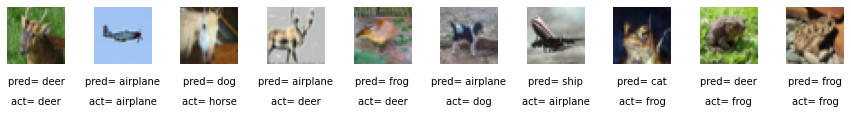

In [103]:
fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax=fig.add_subplot(1,n_to_show ,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred= ' + str(pred_single[idx]), fontsize=10, ha='center',transform=ax.transAxes)
    ax.text(0.5,-0.7,'act= ' + str(actual_single[idx]),fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

#### 합성곱 층

합성곱은 필터를 이미지의 일부분과 픽셀끼리 곱한 후 결과를 더한 것
- 이미지 영역이 필터와 비슷할수록 큰 양수가 출력되고 필터와 반대일수록 큰 음수가 출력됨

- **stride**
    - 스트라이드는 필터가 한 번에 입력 위를 이동하는 크기,
    - stride = 2로 하면 출력 텐서의 높이와 너비는 입력 텐서의 절반이 된다!
    - network 통과하면서 채널 수 늘리고, 텐서의 공간 방향 크기 줄이는 데 사용
- **padding**
    - padding=same은 입력 데이터를 0으로 패딩하여 stride = 1일 때 출력의 크기를 입력 크기와 동일하게 만듦
    - padding=same 지정하면 여러 개의 합성곱 층을 통과할 때 텐서의 크기를 쉽게 파악할 수 있는 유용함!

In [114]:
input_layer=Input(shape=(32,32,3))

In [118]:
conv_layer_1 = layers.Conv2D(filters = 10,  kernel_size = (4,4), strides = 2, padding = 'same')(input_layer)

In [119]:
conv_layer_2 = layers.Conv2D(filters = 20,  kernel_size = (3,3), strides = 2, padding = 'same')(conv_layer_1)

In [120]:
flatten_layer=Flatten()(conv_layer_2)

In [121]:
output_layer=Dense(units=10, activation='softmax')(flatten_layer)

In [122]:
model=Model(input_layer,output_layer)

In [123]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


#### 배치 정규화

- gradient exploding 기울기 폭주
    - 오차가 네트워크를 통해 거꾸로 전파되면서 앞에 놓인 층의 gradient 계산이 기하급수적으로 증가하는 경우
- covariate shoft 공변량 변화
    - 네트워크가 훈련됨에 따라 가중치 값이 랜덤한 초깃값과 멀어지기 때문에 인력 스케일을 조정해도 모든 층의 활성화 울력의 scale이 안정적이지 않을 수 있음

**배치정규화**
- 배치에 대해 각 입력 채널별로 평균과 표준 편차를 계산한 다음 평균을 빼고 표준편차로 나누어 정규화

![](https://gaussian37.github.io/assets/img/dl/concept/batchnorm/batchnorm.png)

#### 드롭아웃 층

이전 층의 unit 일부를 랜덤하게 선택하여 출력을 0으로 지정
- 과대 적합 문제 맊기 가능

#### 합성곱/배치정규화/드롭아웃 적용

In [150]:
input_layer=Input((32,32,3))

In [151]:
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

In [152]:
x= layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

In [153]:
x= layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

In [154]:
x= layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

In [155]:
x=Flatten()(x)

In [156]:
x=Dense(128)(x)

In [157]:
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

In [158]:
x=layers.Dropout(rate=0.5)(x)

In [159]:
x=Dense(NUM_CLASSES)(x)

In [160]:
output_layer = layers.Activation('softmax')(x)

In [161]:
model=Model(input_layer,output_layer)

leakyrelu 층과 batchnomalization 층이 뒤따르는 4개의 conv2d 층을 쌓고 만들어진 텐서를 일렬로 펼쳐 128개의 unit을 가진 dense 층에 통과시키고 다시 한 번 batchnomalization층과 leakyrelu층을 거쳐 dropout층을 지나 10개의 unit을 가진 dense 층이 최종 출력을 만든다.

In [162]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

kernal인 3 곱하기 3 곱하기 3(컬러 rgb 3개) = 27 곱하기 32 = 896

In [165]:
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ['accuracy'])

In [166]:
model.fit(x_train, # 원본 이미지 데이터
      y_train, # one-hot encoding된 class label
      batch_size = 32, # 훈련 step마다 network에 전달될 sample 개수 결정
      epochs = 10, # network가 전체 훈련 data에 대해 반복하여 훈련할 횟수
      shuffle = True) # True면 훈련 step마다 batch를 훈련 data에서 중복 허용않고 random하게 추출

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6410 - accuracy: 0.4290
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3050 - accuracy: 0.5392
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1527 - accuracy: 0.5967
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0484 - accuracy: 0.6345
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9833 - accuracy: 0.6552
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9276 - accuracy: 0.6780
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8856 - accuracy: 0.6897
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8444 - accuracy: 0.7057
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8059 - accuracy: 0.7213
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [167]:
model.evaluate(x_test,y_test,batch_size=1000)

10/10 [==============================] - 1s 61ms/step - loss: 0.8867 - accuracy: 0.6866


[0.8867210149765015, 0.6866000294685364]

------------------

#### GAN keras로 해보기

https://github.com/davidADSP/GDL_code

ref: https://keras.io/examples/generative/conditional_gan/

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow_docs.vis import embed
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import imageio

In [3]:
batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28
latent_dim = 128

In [4]:
# We'll use all the available examples from both the training and test
# sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
all_labels = keras.utils.to_categorical(all_labels, 10)

# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_digits.shape}")
print(f"Shape of training labels: {all_labels.shape}")


Shape of training images: (70000, 28, 28, 1)
Shape of training labels: (70000, 10)


In [5]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

138 11


In [6]:
# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [7]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data

        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = tf.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = tf.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = tf.concat([generated_images, image_one_hot_labels], -1)
        real_image_and_labels = tf.concat([real_images, image_one_hot_labels], -1)
        combined_images = tf.concat(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = tf.concat([fake_images, image_one_hot_labels], -1)
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

In [8]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

cond_gan.fit(dataset, epochs=5)

Epoch 1/5
1094/1094 [==============================] - 445s 406ms/step - g_loss: 1.2610 - d_loss: 0.4980
Epoch 2/5
1094/1094 [==============================] - 444s 406ms/step - g_loss: 1.3339 - d_loss: 0.4899
Epoch 3/5
1094/1094 [==============================] - 448s 409ms/step - g_loss: 1.7392 - d_loss: 0.3492
Epoch 4/5
1094/1094 [==============================] - 444s 406ms/step - g_loss: 2.4355 - d_loss: 0.1895
Epoch 5/5
1094/1094 [==============================] - 445s 407ms/step - g_loss: 1.1021 - d_loss: 0.6058


In [9]:
# We first extract the trained generator from our Conditiona GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 9  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(first_number, second_number):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([first_number], num_classes)
    second_label = keras.utils.to_categorical([second_number], num_classes)
    first_label = tf.cast(first_label, tf.float32)
    second_label = tf.cast(second_label, tf.float32)

    # Calculate the interpolation vector between the two labels.
    percent_second_label = tf.linspace(0, 1, num_interpolation)[:, None]
    percent_second_label = tf.cast(percent_second_label, tf.float32)
    interpolation_labels = (
        first_label * (1 - percent_second_label) + second_label * percent_second_label
    )

    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = tf.concat([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 1  # @param {type:"slider", min:0, max:9, step:1}
end_class = 5  # @param {type:"slider", min:0, max:9, step:1}

fake_images = interpolate_class(start_class, end_class)



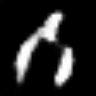

In [10]:
fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
converted_images = tf.image.resize(converted_images, (96, 96)).numpy().astype(np.uint8)
imageio.mimsave("animation.gif", converted_images, fps=1)
embed.embed_file("animation.gif")